In [2]:
#### FINAL PROJECT REPORT ####

In [3]:
# First, before using data for regression analysis, let's clean the data!

In [69]:
#IMPORT ALL TOOLS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# test 123
#READ DATA
listings = pd.read_csv('listings.csv') #load data
print(listings.shape) #read shape of data
print(listings.dtypes) #read datatype

(2959, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [15]:
listings_numeric = listings.select_dtypes(include='number') #creates a dataframe listings_numeric using select_dtypes()
numeric_cols = listings_numeric.columns.values #just retrieve the names of the columns from listings_numeric
print(numeric_cols)
print(listings_numeric)

['id' 'host_id' 'neighbourhood_group' 'latitude' 'longitude' 'price'
 'minimum_nights' 'number_of_reviews' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']
            id    host_id  neighbourhood_group   latitude  longitude  price  \
0         3781       4804                  NaN  42.364130 -71.029910    125   
1         6695       8229                  NaN  42.329940 -71.093510    169   
2        10813      38997                  NaN  42.350610 -71.087870     70   
3        10986      38997                  NaN  42.363520 -71.050750     73   
4        13247      51637                  NaN  42.351640 -71.087520     75   
...        ...        ...                  ...        ...        ...    ...   
2954  48211443  278520291                  NaN  42.265340 -71.096310     40   
2955  48228283  316148588                  NaN  42.356210 -71.061890     74   
2956  48228309  316148588                  NaN  42.354230 -71.061620     64   
2957  48231177  316148588    

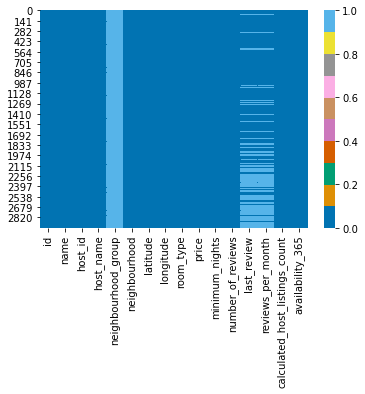

In [16]:
#Creating HEATMAP to show the presence of the missing values
sns.heatmap(listings.isnull(), cmap=sns.color_palette(palette='colorblind'), vmin=0, vmax=1) 
plt.show()

In [98]:
#Now, since we see from the graph above showing that there are missing values in three columns, we need to handle these missing values!

In [17]:
#First create missing indicator for columns with missing data
for col in listings.columns:
    missing_value = listings[col].isnull() #missing_value will create a series with all the columns with null values
    num_missing = missing_value.sum() #this will sum up all the rows that have nulls   
    #now we want to store the columns which have missing data
    if num_missing > 0:  #this condition is still in the for loop.
        print('created missing indicator for: {}'.format(col)) #prints all columns which have missing data
        listings['{}_ismissing'.format(col)] = missing_value

created missing indicator for: neighbourhood_group
created missing indicator for: last_review
created missing indicator for: reviews_per_month


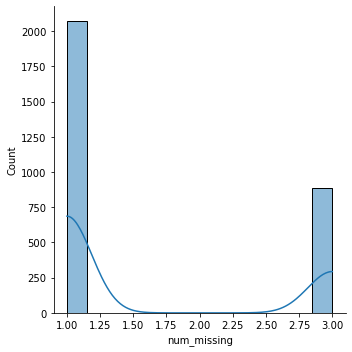

In [18]:
#The output above show the column names that have missing values: neighbourhood_group, last_review, and reviews_per_month
#Here, we plot histogram for these missing values
ismissing_cols = [col for col in listings.columns if 'ismissing' in col] #searching for ismissing in col using list comprehension 
listings['num_missing'] = listings[ismissing_cols].sum(axis=1) #create a new column 'num_missing' 

#Plot a distributional summary
sns.displot(data=listings,x='num_missing',kde=True)
plt.show()

In [19]:
listings[col].dtype #check the contents of col. It is a boolean datatype and holds true/false values

dtype('int64')

In [20]:
listings.columns.dtype

dtype('O')

In [21]:
#We see the histogram of these missing value.
#Calculate percent of missing data in the columns

for col in listings.columns:
    pct_missing = listings[col].isnull().mean() #calculating % of missing values. calling numpy (np)
    print('{} - {}%'.format(col, round(pct_missing*100)))
print(pct_missing)

id - 0%
name - 0%
host_id - 0%
host_name - 0%
neighbourhood_group - 100%
neighbourhood - 0%
latitude - 0%
longitude - 0%
room_type - 0%
price - 0%
minimum_nights - 0%
number_of_reviews - 0%
last_review - 30%
reviews_per_month - 30%
calculated_host_listings_count - 0%
availability_365 - 0%
neighbourhood_group_ismissing - 0%
last_review_ismissing - 0%
reviews_per_month_ismissing - 0%
num_missing - 0%
0.0


In [15]:
#Above we see the percentage of missing value of each column.
#We are going to replace the missing values in last_review column with '_MISSING_' (categorical datatype)
#We are going to replace missing values in reviews_per_month column with median (numerical datatype)
#We are going to drop column neighbourhood_group because all values are missing

In [22]:
#Replace the missing values in last_review column with '_MISSING_'
listings['last_review'] = listings['last_review'].fillna('_MISSING_')

In [23]:
#Replace the missing values with median
med = listings['reviews_per_month'].median() #calculate the median
print(med)
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(med) #create a new column with the calculated median

0.78


In [24]:
#Drop the missing column neighbourhood_group
listings = listings.drop('neighbourhood_group',axis=1)

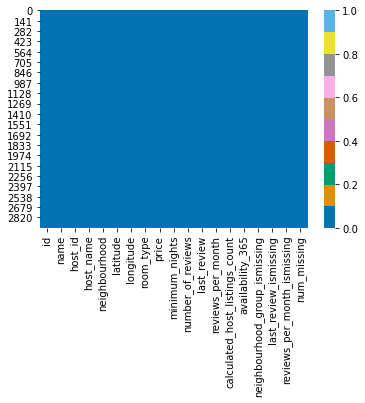

In [25]:
#RECHECK the graphs for update of missing value handling
sns.heatmap(listings.isnull(), cmap=sns.color_palette(palette='colorblind'), vmin=0, vmax=1) 
plt.show()

In [26]:
listings.isnull() #To check if there is any null or missing value in the dataset

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_ismissing,last_review_ismissing,reviews_per_month_ismissing,num_missing
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2955,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2956,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2957,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
#Since price cannot be 0, we drop rows where price equal 0
listings.drop(listings.index[listings["price"]==0], axis=0, inplace=True)

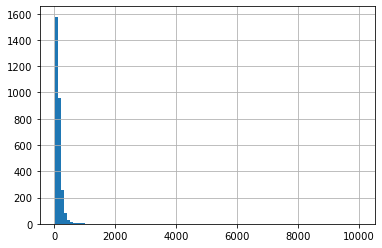

count     2955.000000
mean       148.797293
std        295.411137
min         19.000000
25%         70.000000
50%        110.000000
75%        174.000000
max      10000.000000
Name: price, dtype: float64

In [28]:
#Now it is time to detect OUTLIERS!
#Find outliers in our outcome variable using histogram
listings.price.hist(bins=100)
plt.show()
listings['price'].describe() #descriptive statistics

In [125]:
#Drop values that are outliers
listings.drop(listings.index[listings["price"]==10000], axis=0, inplace=True)

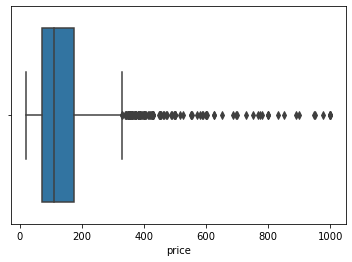

In [36]:
#Using box plot to show outliers in variable price
sns.boxplot(data=listings,x='price')
plt.show()

In [37]:
#Delete the largest outlier in the price to make a better look at the boxplot of price
listings.drop(listings.index[listings["price"]>1000], axis=0, inplace=True)

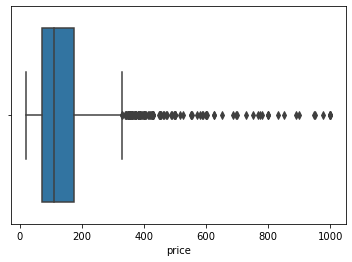

In [38]:
#Showing boxplot aga
sns.boxplot(data=listings,x='price')
plt.show()

In [39]:
listings['neighbourhood'].unique()

array(['East Boston', 'Roxbury', 'Back Bay', 'North End', 'Beacon Hill',
       'Dorchester', 'South End', 'Jamaica Plain', 'Charlestown',
       'South Boston', 'Bay Village', 'Brighton', 'West Roxbury',
       'Roslindale', 'Downtown', 'Mission Hill', 'West End',
       'South Boston Waterfront', 'Fenway', 'Allston', 'Hyde Park',
       'Chinatown', 'Mattapan', 'Longwood Medical Area',
       'Leather District'], dtype=object)

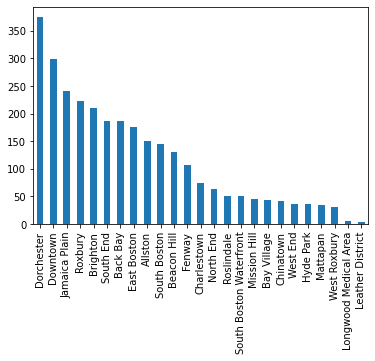

In [40]:
#Using a bar chart to see the distribution of a categorical variable neighbourhood
listings['neighbourhood'].value_counts().plot.bar()
plt.show()

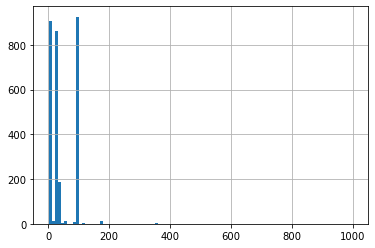

count    2947.000000
mean       42.567696
std        44.599954
min         1.000000
25%         2.000000
50%        29.000000
75%        91.000000
max      1000.000000
Name: minimum_nights, dtype: float64

In [41]:
#Find outliers in our explanatory variable
listings.minimum_nights.hist(bins=100)
plt.show()
#Use descriptive statistics
listings['minimum_nights'].describe()

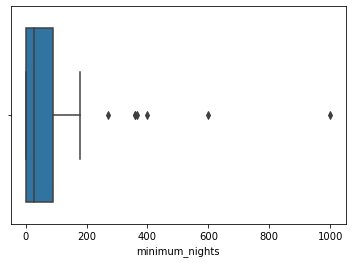

In [42]:
#Using box plot to show outliers in variable minimum_nights
sns.boxplot(data=listings,x='minimum_nights')
plt.show()

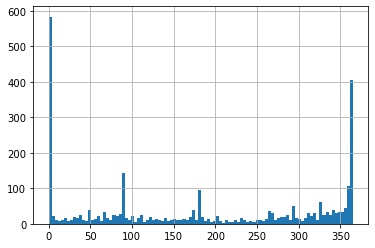

count    2947.000000
mean      183.953173
std       140.910119
min         0.000000
25%        42.500000
50%       179.000000
75%       334.000000
max       365.000000
Name: availability_365, dtype: float64

In [43]:
#Find outliers in our outcome variable
listings.availability_365.hist(bins=100)
plt.show()
listings['availability_365'].describe() #descriptive statistics

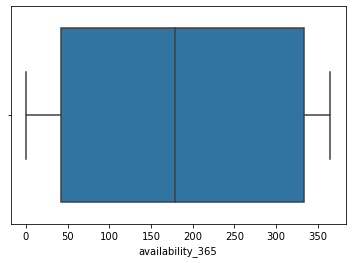

In [44]:
#Using box plot to show outliers in availability_365
sns.boxplot(data=listings,x='availability_365')
plt.show()

In [45]:
listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

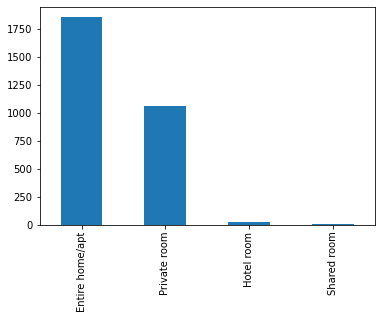

In [46]:
#Using a bar chart to see the distribution of a categorical variable neighbourhood
listings['room_type'].value_counts().plot.bar()
plt.show()

In [130]:
# REGRESSION #

In [47]:
#IMPORT TOOLS
import patsy                           # provides a syntax for specifying models  
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

In [132]:
listings

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_ismissing,last_review_ismissing,reviews_per_month_ismissing,num_missing
0,3781,HARBORSIDE-Walk to subway,4804,Frank,East Boston,42.364130,-71.029910,Entire home/apt,125,29,18,12/20/2020,0.26,1,224,True,False,False,1
1,6695,$99 Special!! Home Away! Condo,8229,Terry,Roxbury,42.329940,-71.093510,Entire home/apt,169,29,115,11/2/2019,0.82,4,0,True,False,False,1
2,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,Back Bay,42.350610,-71.087870,Entire home/apt,70,29,5,12/2/2020,0.09,11,364,True,False,False,1
3,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,North End,42.363520,-71.050750,Entire home/apt,73,29,2,5/23/2016,0.03,11,364,True,False,False,1
4,13247,Back Bay studio apartment,51637,Susan,Back Bay,42.351640,-71.087520,Entire home/apt,75,91,0,_MISSING_,0.78,2,0,True,True,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,48211443,"Cozy, Private Rm w/ 40""Tv, Mini Frig, Queen Bed",278520291,Glen,Mattapan,42.265340,-71.096310,Private room,40,1,0,_MISSING_,0.78,3,350,True,True,True,3
2955,48228283,"Last Minute Specials! Downtown Boston Studio, ...",316148588,TemplePlace,Downtown,42.356210,-71.061890,Entire home/apt,74,2,0,_MISSING_,0.78,4,347,True,True,True,3
2956,48228309,"204 Boston Studio, Ready For Long & Short Stays",316148588,TemplePlace,Downtown,42.354230,-71.061620,Private room,64,2,0,_MISSING_,0.78,4,104,True,True,True,3
2957,48231177,508 Stylish Studio in Downtown Boston!,316148588,TemplePlace,Beacon Hill,42.356100,-71.063020,Entire home/apt,77,2,0,_MISSING_,0.78,4,65,True,True,True,3


In [48]:
# FIRST MODEL - price ~ neighbourhood
result1 = smf.ols('price ~ neighbourhood', data=listings).fit()

In [49]:
#Inspect result1
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     12.26
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           8.83e-46
Time:                        16:51:53   Log-Likelihood:                -17945.
No. Observations:                2947   AIC:                         3.594e+04
Df Residuals:                    2922   BIC:                         3.609e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [135]:
#MODEL1 INTERPRETATION:
#Listings belonging to neighbourhood Leather District had a significant increase in rental price by 1015 unit of dollar, holding other variable constant

In [50]:
# SECOND MODEL - price ~ neighbourhood + minimum_nights
result2 = smf.ols('price ~ neighbourhood + minimum_nights', data=listings).fit()

In [51]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     11.83
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.63e-45
Time:                        16:51:59   Log-Likelihood:                -17944.
No. Observations:                2947   AIC:                         3.594e+04
Df Residuals:                    2921   BIC:                         3.610e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [138]:
#MODEL2 INTERPRETATION:
#An increase in minimum nights by 1 unit will decrease the price of rental by 0.07 unit of dollar.
#Based on p-value, this effect is not significant, holding everything else constant.

In [52]:
# THIRD MODEL - price ~ neighbourhood + minimum_nights + availability_365
result3 = smf.ols('price ~ neighbourhood + minimum_nights + availability_365', data=listings).fit()

In [53]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     11.42
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.24e-45
Time:                        16:52:04   Log-Likelihood:                -17943.
No. Observations:                2947   AIC:                         3.594e+04
Df Residuals:                    2920   BIC:                         3.610e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [141]:
#MODEL3 INTERPRETATION:
#An increase in number of listing days by 1 will decrease the price of rental by 0.046 unit of dollar.
#Based on p-value, this effect is not very significant, holding everything else constant.

In [54]:
# FOURTH MODEL - price ~ neighbourhood + minimum_nights + availability_365 + room_type
result4 = smf.ols('price ~ neighbourhood + minimum_nights + availability_365 + room_type', data=listings).fit()

In [55]:
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     26.60
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.05e-126
Time:                        16:52:09   Log-Likelihood:                -17740.
No. Observations:                2947   AIC:                         3.554e+04
Df Residuals:                    2917   BIC:                         3.572e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [144]:
#MODEL4 INTERPRETATION: There is no significant effect to claim that renting a hotel room type or a shared room type will increase or decrease the rental price.
#However, renting private room type significantly decrease rental price by 78.88 unit of dollar.

In [56]:
#To only show Parameters, Intercepts, Confidence Intervals, and R-sqared
print('The parameters are: \n', result4.params, '\n')
print('The confidence intervals are:\n', result4.conf_int(), '\n')
print('The r-sqared is:', result4.rsquared)

The parameters are: 
 Intercept                                   156.771723
neighbourhood[T.Back Bay]                    13.773426
neighbourhood[T.Bay Village]                  2.241570
neighbourhood[T.Beacon Hill]                -10.364469
neighbourhood[T.Brighton]                   -15.188390
neighbourhood[T.Charlestown]                 64.956253
neighbourhood[T.Chinatown]                  -13.088347
neighbourhood[T.Dorchester]                   1.009783
neighbourhood[T.Downtown]                    23.456960
neighbourhood[T.East Boston]                 -2.291210
neighbourhood[T.Fenway]                      41.802153
neighbourhood[T.Hyde Park]                  -33.771080
neighbourhood[T.Jamaica Plain]               16.137104
neighbourhood[T.Leather District]             2.471416
neighbourhood[T.Longwood Medical Area]       43.617877
neighbourhood[T.Mattapan]                   -19.178572
neighbourhood[T.Mission Hill]                37.650730
neighbourhood[T.North End]                 

In [146]:
#CONCLUSION
#After controlling for minimum_nights and availability_365, the model still shows significant relation between price and Leather District neighbourhood.
#Therefore, we can say that Listings belonging to neighbourhood Leather District had a significant increase in rental price by 1015 unit of dollar, holding other variable constant
#Additionally, the coefficient between price and minimum_nights shows that increase in number of minimum night will decrease the price of the rental.
#Another coefficient also shows that the higher the number of listing days will decrease the price of the rental.
#This is not a perfect model because many coefficients do not have a significant level. The data also has issues, such as missing values, and outliers.

In [147]:
#Time to TRANSFORMING DATA

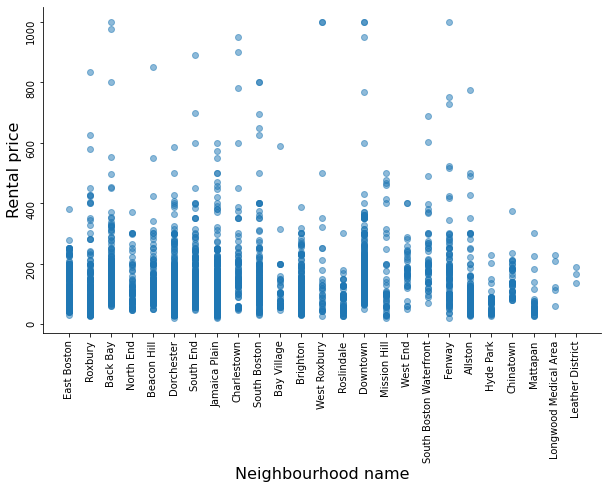

In [57]:
#To create a scatter plot of price and neighbourhood
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(listings['neighbourhood'], listings['price'], marker='o', alpha = 0.5 )

ax.set_xlabel('Neighbourhood name', fontsize=16)
ax.set_ylabel('Rental price', fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=90)

In [58]:
#COMBINE ALL THREE MODELS TOGETHER
from statsmodels.iolib.summary2 import summary_col #create regression table for your report

table = summary_col(
    [result1, result2, result3, result4], #results of the fitted models
    model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4'], #models fitted above
    stars=True, #level of significance
    regressor_order = ['Intercept', 'price', 'neighbourhood', 'minimum_nights', 'availability_365', 'room_type'], #order of explanatory vars in the table
    float_format='%0.2f', 
    drop_omitted = False #
    )

table.add_title('Does neighbourhood affect rental price?')
#table.add_text('any other table info...') #add other table info to be printed with the table

print(table.as_text())

# The 'w' is for 'write'.
fout = open('table1.txt', 'w')
fout.write(table.as_text()) #can export as text, latex or html
fout.close()

                    Does neighbourhood affect rental price?
                                          Model 1   Model 2   Model 3   Model 4 
--------------------------------------------------------------------------------
Intercept                                107.35*** 110.51*** 108.39*** 156.77***
                                         (8.75)    (9.15)    (9.34)    (9.05)   
minimum_nights                                     -0.05     -0.05     0.01     
                                                   (0.05)    (0.05)    (0.04)   
availability_365                                             0.02      0.02     
                                                             (0.01)    (0.01)   
neighbourhood[T.Roslindale]              -20.86    -22.23    -23.71    -21.88   
                                         (17.37)   (17.41)   (17.46)   (16.31)  
neighbourhood[T.South End]               46.16***  44.68***  44.30***  8.35     
                                         (11.76) 

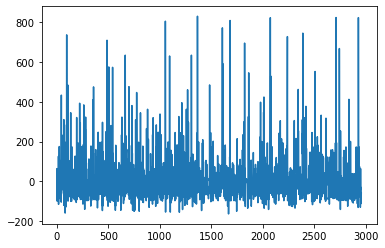

In [59]:
resid1=result1.resid.plot()

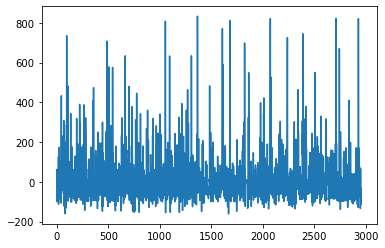

In [60]:
resid2=result2.resid.plot()

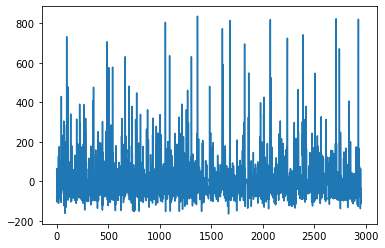

In [62]:
resid3=result3.resid.plot()

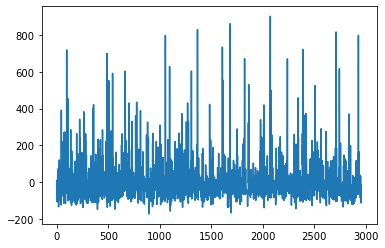

In [61]:
resid4=result4.resid.plot()

In [63]:
#Show descriptive statistic in form of a table
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,num_missing
count,2.947000e+03,2.947000e+03,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,2.865768e+07,1.087794e+08,42.337696,-71.082327,138.321683,42.567696,37.184255,1.207540,20.192399,183.953173,1.597218
std,1.482702e+07,1.162177e+08,0.026668,0.032919,111.983401,44.599954,69.933799,1.597732,33.752272,140.910119,0.915451
min,3.781000e+03,4.804000e+03,42.235200,-71.173440,19.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000
25%,1.625765e+07,1.605219e+07,42.320940,-71.102720,69.500000,2.000000,0.000000,0.410000,1.000000,42.500000,1.000000
50%,3.029842e+07,4.849451e+07,42.344790,-71.072210,110.000000,29.000000,6.000000,0.780000,5.000000,179.000000,1.000000
75%,4.246326e+07,1.966313e+08,42.355200,-71.060540,173.000000,91.000000,40.000000,1.370000,21.000000,334.000000,3.000000
max,4.823128e+07,3.881499e+08,42.393720,-70.997010,1000.000000,1000.000000,592.000000,26.850000,134.000000,365.000000,3.000000
